In [1]:
import automata_render

from automata_environment import AutomataEnvironment
from conways_rules import ConwaysRules
from simple_conv_net import SimpleConvNet

In [2]:
environment = AutomataEnvironment(ConwaysRules(), 40, 50)
environment.randomize_state()

automata_render.inline_video(environment, frame_interval_millis = 50, frame_count = 100)

Densely pack seven rows of gliders and watch them dance.

In [3]:
environment.set_state_from_strings([
    "________________________________________",
    "_XXX__XXX__XXX__XXX__XXX__XXX__XXX__XXX_",
    "___X____X____X____X____X____X____X____X_",
    "__X____X____X____X____X____X____X____X__",
    "________________________________________",
] * 7)

automata_render.inline_video(environment, frame_interval_millis = 20, frame_count = 20, loop = True)

This is how the neural automata training should work.

```
# NOTE: conv nets should declare their toroidal padding requirements so the environment can give what the rules need

conv_net = SimpleConvNet(hidden_channels = 10)

neural_rules = NeuralRules(conv_net)
AutomataEnvironment(ConwaysRules())

neural_rules.train(glider_land, iterations = 1000)  # plots loss as train

neural_environment = AutomataEnvironment(neural_rules)  # pass the whole grid when iterating so we have kernel flexibility
neural_environment.copy_state(glider_land)

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30,)
```

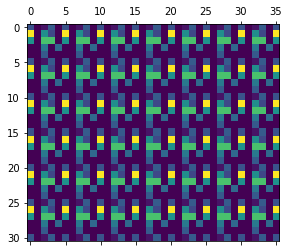

In [22]:
conv_net = SimpleConvNet(hidden_channels = 10).double()

import torch
import numpy as np

t = torch.from_numpy(environment.current_grid).view(1, 1, 35, 40).double()

v = torch.autograd.Variable(t)

y = conv_net(v)

y = np.array(y, dtype=float).reshape((31, 36))

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
mat = ax.matshow(y)
mat.set_data(y)

plt.show()